In [1]:
from rdkit import Chem
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw/jak2_data.csv')
df

,SMILES,pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59
...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97


In [3]:
def check_smiles(mol):
    atoms_list = ['C', 'O', 'N', 'S', 'Na', 'K', 'F', 'Cl', 'Br', 'I']
    mol = Chem.MolFromSmiles(mol)
    if mol:
        mol_formula = [i.GetSymbol() for i in mol.GetAtoms()]
        for atom in mol_formula :
            if atom in atoms_list:
                return True
        return False
    return False

def standardization(mol):
    mol = Chem.MolFromSmiles(mol)
    return Chem.MolToSmiles(mol, canonical=True)

def activity_check(value):
    if value > 7:
        return 1
    return 0

In [4]:
df['smi_check'] = df['SMILES'].apply(check_smiles)
df

,SMILES,pIC50,smi_check
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,True
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,True
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,True
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,True
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,True
...,...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72,True
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76,True
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78,True
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97,True


In [5]:
df = df[df['smi_check'] == True]
df

,SMILES,pIC50,smi_check
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,True
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,True
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,True
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,True
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,True
...,...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72,True
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76,True
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78,True
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97,True


In [6]:
df['SMILES'] = df['SMILES'].apply(standardization)

In [7]:
df = df.drop_duplicates()
df

,SMILES,pIC50,smi_check
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,True
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,True
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,True
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,True
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,True
...,...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72,True
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76,True
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78,True
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97,True


In [8]:
duplicate_smi = df[df.duplicated(['SMILES'])]
duplicate_smi

,SMILES,pIC50,smi_check
192,O=C1NC(=O)C(c2c[nH]c3ccccc23)=C1Nc1cccc(OC2CCN...,5.91,True
226,CC(=O)NC1CCc2ccc(Oc3cnc4[nH]cc(C(=O)NC(C)C)c4n...,6.00,True
364,NC(=O)c1cnc2[nH]ccc2c1NC1CCCN(Cc2ccccc2)C1,6.37,True
393,N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc...,6.43,True
397,CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)...,6.45,True
...,...,...,...
1775,CC(O)CN1CCN(c2cccc(Nc3nc4c(-c5ccc(S(C)(=O)=O)c...,9.12,True
1889,CC(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.40,True
1892,CN(c1[nH]cnc2nccc1-2)C1CCC(CS(=O)(=O)N2CCC(C)(...,10.44,True
1899,COC(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.56,True


In [9]:
df.loc[192].SMILES

'O=C1NC(=O)C(c2c[nH]c3ccccc23)=C1Nc1cccc(OC2CCN(c3ccnc(F)c3)C2)c1'

In [10]:
df.loc[df['SMILES'] == 'CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)cc3)n2)C(C#N)C1']

,SMILES,pIC50,smi_check
312,CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)...,6.24,True
397,CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)...,6.45,True
405,CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)...,6.47,True
724,CC1CC(C)N1C1CCC(n2cc(C(N)=O)c(Nc3ccc(C(F)(F)F)...,7.08,True


In [11]:
df.loc[393].SMILES

'N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc2ccc(C(F)(F)F)cc2)n1'

In [12]:
df.loc[df['SMILES'] == 'N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc2ccc(C(F)(F)F)cc2)n1']

,SMILES,pIC50,smi_check
223,N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc...,6.00,True
393,N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc...,6.43,True
570,N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc...,6.82,True
788,N#CC1CC(NC(C2CC2)C(F)(F)F)CCC1n1cc(C(N)=O)c(Nc...,7.17,True


In [13]:
df.loc[226].SMILES

'CC(=O)NC1CCc2ccc(Oc3cnc4[nH]cc(C(=O)NC(C)C)c4n3)cc21'

In [14]:
df.loc[df['SMILES'] == 'CC(=O)NC1CCc2ccc(Oc3cnc4[nH]cc(C(=O)NC(C)C)c4n3)cc21']

,SMILES,pIC50,smi_check
162,CC(=O)NC1CCc2ccc(Oc3cnc4[nH]cc(C(=O)NC(C)C)c4n...,5.77,True
226,CC(=O)NC1CCc2ccc(Oc3cnc4[nH]cc(C(=O)NC(C)C)c4n...,6.00,True


In [15]:
df['activity'] = df['pIC50'].apply(activity_check)
df

/var/folders/v2/36rjz6_d71n_h6pwq221s8_00000gn/T/ipykernel_4651/1687023392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity'] = df['pIC50'].apply(activity_check)


,SMILES,pIC50,smi_check,activity
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,True,0
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,True,0
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,True,0
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,True,0
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,True,0
...,...,...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72,True,1
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76,True,1
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78,True,1
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97,True,1


In [16]:
act = df[df['activity'] == 1]
inact = df[df['activity'] == 0]
print('active molecules', len(act))
print('inactive molecules', len(inact))

active molecules 1226
inactive molecules 676


<Axes: >

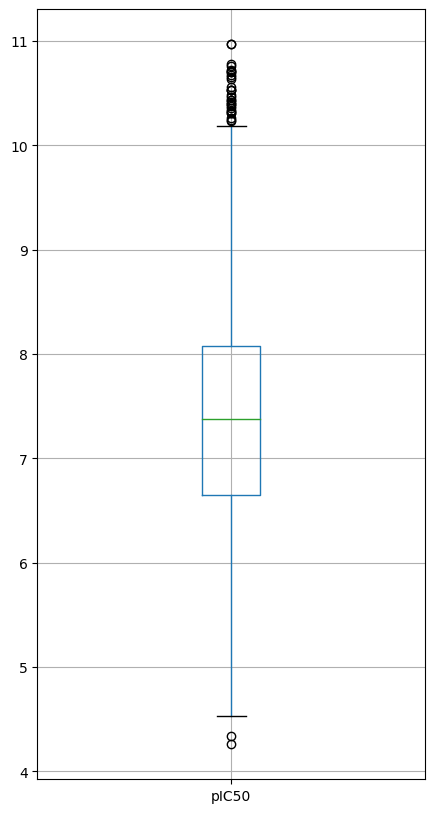

In [17]:
df.boxplot(column=['pIC50'], figsize=(5, 10))

In [18]:
df_new = df[['SMILES', 'pIC50','activity']]
df_new.to_csv('../data/interim/jak2_pIC50_data.csv', index = False)